In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json
import requests
import time
import tqdm
from datetime import datetime
plt.rcParams['axes.grid'] = True
plt.rcParams['grid.alpha'] = 0.3
plt.rcParams['axes.titlesize'] = 18
genesis = 1606824023

In [31]:
prop1 = []
val = 16
while val < 41:
    prop1.append(val)
    val *= 1.01
prop1 = np.asarray(prop1)

prop2 = []
val = 16
while val < 45:
    prop2.append(val)
    val *= 1.05
prop2 = np.asarray(prop2)

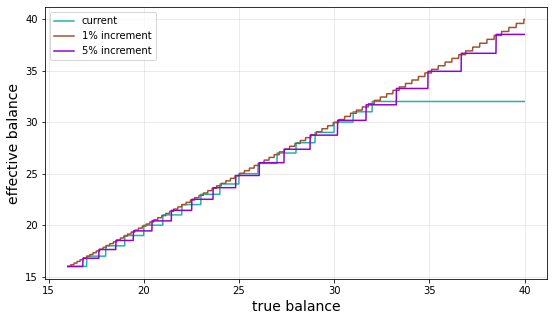

In [32]:
f, ax = plt.subplots(figsize=(9,5))

def cur(x): 
    if x < 32:
        return np.floor(x)
    return 32

def propVal(prop, x):
    for i in range(len(prop)-1):
        if x >= prop[i] and x < prop[i+1]:
            return prop[i]
    raise ValueError("no val found")


x = np.arange(16, 40, 0.01)
yCur = np.asarray([cur(v) for v in x])
yProp1 = np.asarray([propVal(prop1, v) for v in x])
yProp2 = np.asarray([propVal(prop2, v) for v in x])
ax.plot(x, yCur, '-', fillstyle='none', color='lightseagreen', label='current')
ax.plot(x, yProp1, '-', fillstyle='none', color='sienna', label='1% increment')
ax.plot(x, yProp2, '-', fillstyle='none', color='darkviolet', label='5% increment')

ax.set_xlabel('true balance', size=14)
ax.set_ylabel('effective balance', size=14)
ax.legend()
plt.show()

In [33]:
def cdf(k):
    return (np.floor(k) + 1) / 255

In [37]:
vals = np.asarray([255 * e / 32 for e in range(16,33)])
cdfs = cdf(vals)

In [38]:
cdfs

array([0.50196078, 0.53333333, 0.56470588, 0.59607843, 0.62745098,
       0.65882353, 0.69019608, 0.72156863, 0.75294118, 0.78431373,
       0.81568627, 0.84705882, 0.87843137, 0.90980392, 0.94117647,
       0.97254902, 1.00392157])

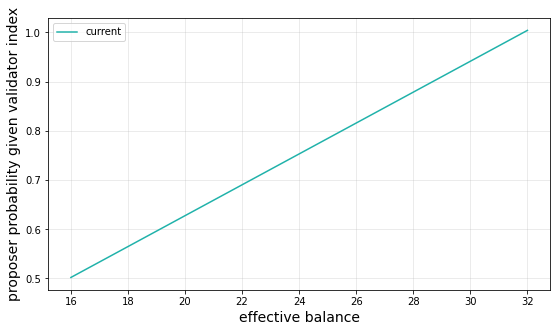

In [39]:
f, ax = plt.subplots(figsize=(9,5))


x = np.arange(16, 33)
ax.plot(x, cdfs, '-', fillstyle='none', color='lightseagreen', label='current')

ax.set_xlabel('effective balance', size=14)
ax.set_ylabel('proposer probability given validator index', size=14)
ax.legend()
plt.show()